# Multi-Scenario MORDM

Multi-scenario MORMD is an extension of normal MORDM to better include robustness considerations within the search phase. It starts from the scenario discovery results resulting from MORDM. Next, from the experiments within this box, a set of scenarios is selected. 


In [2]:
from ema_workbench import load_results

experiments, outcomes = load_results('./results/selected_results.tar.gz')

In [3]:
experiments['b'].max()

0.3403715173740685

## Step 2: Searching for candidate solutions

In the second step of MORDM, candidate strategies are identified which are pareto optimal conditional on a reference scenario. These candiate strategies are identified through search with multi-objective evolutionary algorithms, that iteratively evaluate a large number of alternatives on multiple objectives until they find the best candidates. For instance, when we optimize the lake model levers, the lake model function will be called for each candidate evaluation, and the corresponding four objective values will be generated. 

Take the model interface developed in the previous step and use the optimization functionality of the workbench to identify the pareto approximate set of solutions. Try the following:
* change the epsilon values between 0.01 and 0.1, what changes, why?
* change the number of function evaluations from 1000 to 10.000 (this requires using multiprocessing unless you are very patient). What is the difference? You can use  convergence as explained in assignment 7 for this

In [4]:
from dps_lake_model import lake_model

from ema_workbench import (Model, RealParameter, ScalarOutcome,
                           MultiprocessingEvaluator, ema_logging,
                           Constant)

ema_logging.log_to_stderr(ema_logging.INFO)

#instantiate the model
lake_model = Model('lakeproblem', function=lake_model)
lake_model.time_horizon = 100 # used to specify the number of timesteps

#specify uncertainties
lake_model.uncertainties = [RealParameter('mean', experiments['mean'].min(), experiments['mean'].max()),
                            RealParameter('stdev', experiments['stdev'].min(), experiments['stdev'].max()),
                            RealParameter('b', experiments['b'].min(), experiments['b'].max()),
                            RealParameter('q', experiments['q'].min(), experiments['q'].max()),
                            RealParameter('delta', experiments['delta'].min(), experiments['delta'].max())]

# set levers, one for each time step
lake_model.levers = [RealParameter('c1', -2, 2),
                     RealParameter('c2', -2, 2),
                     RealParameter('r1', 0, 2),
                     RealParameter('r2', 0, 2),
                     RealParameter('w1', 0, 1)]

#specify outcomes 
lake_model.outcomes = [ScalarOutcome('max_P', kind=ScalarOutcome.MINIMIZE),
                       ScalarOutcome('utility', kind=ScalarOutcome.MAXIMIZE), 
                       ScalarOutcome('inertia', kind=ScalarOutcome.MAXIMIZE),
                       ScalarOutcome('reliability', kind=ScalarOutcome.MAXIMIZE)]

In [5]:
from ema_workbench.em_framework.optimization import (HyperVolume,
                                                     EpsilonProgress)

from ema_workbench.em_framework.optimization import (HyperVolume,
                                                     EpsilonProgress)
from ema_workbench import Constraint

#specify outcomes 
lake_model.outcomes = [ScalarOutcome('max_P', kind=ScalarOutcome.MINIMIZE,
                                     expected_range=(0,5)),
                       ScalarOutcome('utility', kind=ScalarOutcome.MAXIMIZE,
                                     expected_range=(0,2)),
                       ScalarOutcome('inertia', kind=ScalarOutcome.MAXIMIZE,
                                    expected_range=(0,1)),
                       ScalarOutcome('reliability', kind=ScalarOutcome.MAXIMIZE,
                                     expected_range=(0,1))]

convergence_metrics = [HyperVolume.from_outcomes(lake_model.outcomes),
                       EpsilonProgress()]

[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/1000 nfe
[MainProcess/INFO] generation 5: 499/1000 nfe
[MainProcess/INFO] generation 10: 994/1000 nfe
[MainProcess/INFO] optimization completed, found 10 solutions
[MainProcess/INFO] terminating pool


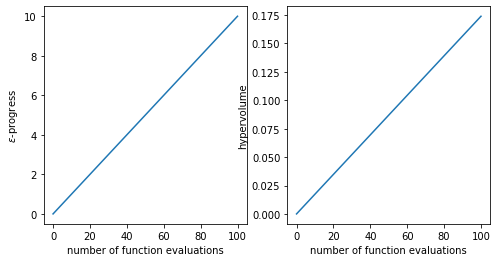

In [10]:
with MultiprocessingEvaluator(lake_model) as evaluator:
    results1, convergence1= evaluator.optimize(nfe=1000, 
                                               epsilons=[0.1, 0.1, 0.1, 0.1], 
                                               convergence=convergence_metrics)
    
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(8,4))
ax1.plot(convergence1.nfe, convergence1.epsilon_progress)
ax1.set_ylabel('$\epsilon$-progress')
ax2.plot(convergence1.nfe, convergence1.hypervolume)
ax2.set_ylabel('hypervolume')

ax1.set_xlabel('number of function evaluations')
ax2.set_xlabel('number of function evaluations')
plt.show()

[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/10000 nfe
[MainProcess/INFO] generation 5: 496/10000 nfe
[MainProcess/INFO] generation 10: 992/10000 nfe
[MainProcess/INFO] generation 15: 1489/10000 nfe
[MainProcess/INFO] generation 20: 1986/10000 nfe
[MainProcess/INFO] generation 25: 2481/10000 nfe
[MainProcess/INFO] generation 30: 2976/10000 nfe
[MainProcess/INFO] generation 35: 3470/10000 nfe
[MainProcess/INFO] generation 40: 3960/10000 nfe
[MainProcess/INFO] generation 45: 4455/10000 nfe
[MainProcess/INFO] generation 50: 4949/10000 nfe
[MainProcess/INFO] generation 55: 5445/10000 nfe
[MainProcess/INFO] generation 60: 5940/10000 nfe
[MainProcess/INFO] generation 65: 6434/10000 nfe
[MainProcess/INFO] generation 70: 6932/10000 nfe
[MainProcess/INFO] generation 75: 7430/10000 nfe
[MainProcess/INFO] generation 80: 7921/10000 nfe
[MainProcess/INFO] generation 85: 8417/10000 nfe
[MainProcess/INFO] generation 90: 8911/10000 nfe
[MainProcess/INFO] generation 95: 9408/10000

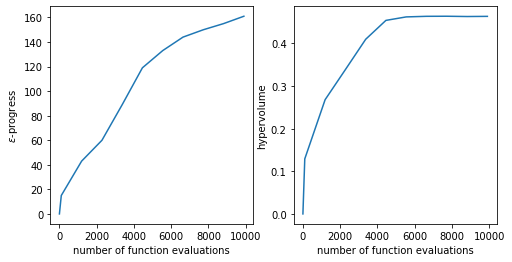

In [11]:
with MultiprocessingEvaluator(lake_model) as evaluator:
    results2, convergence2= evaluator.optimize(nfe=10000, 
                                               epsilons=[0.1, 0.1, 0.1, 0.1], 
                                               convergence=convergence_metrics)
    
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(8,4))
ax1.plot(convergence2.nfe, convergence2.epsilon_progress)
ax1.set_ylabel('$\epsilon$-progress')
ax2.plot(convergence2.nfe, convergence2.hypervolume)
ax2.set_ylabel('hypervolume')

ax1.set_xlabel('number of function evaluations')
ax2.set_xlabel('number of function evaluations')
plt.show()

[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/1000 nfe
[MainProcess/INFO] generation 5: 499/1000 nfe
[MainProcess/INFO] generation 10: 993/1000 nfe
[MainProcess/INFO] optimization completed, found 74 solutions
[MainProcess/INFO] terminating pool


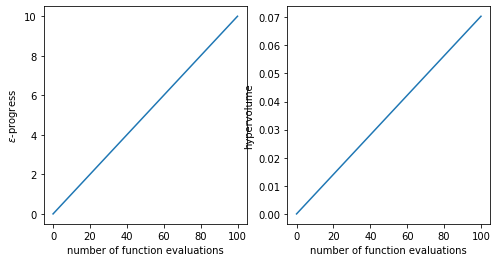

In [12]:
with MultiprocessingEvaluator(lake_model) as evaluator:
    results3, convergence3= evaluator.optimize(nfe=1000, 
                                               epsilons=[0.01, 0.01, 0.01, 0.01], 
                                               convergence=convergence_metrics)
    
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(8,4))
ax1.plot(convergence3.nfe, convergence3.epsilon_progress)
ax1.set_ylabel('$\epsilon$-progress')
ax2.plot(convergence3.nfe, convergence3.hypervolume)
ax2.set_ylabel('hypervolume')

ax1.set_xlabel('number of function evaluations')
ax2.set_xlabel('number of function evaluations')
plt.show()

[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/10000 nfe
[MainProcess/INFO] generation 5: 496/10000 nfe
[MainProcess/INFO] generation 10: 993/10000 nfe
[MainProcess/INFO] generation 15: 1491/10000 nfe
[MainProcess/INFO] generation 20: 1989/10000 nfe
[MainProcess/INFO] generation 25: 2486/10000 nfe
[MainProcess/INFO] generation 30: 2979/10000 nfe
[MainProcess/INFO] generation 35: 3469/10000 nfe
[MainProcess/INFO] generation 40: 3960/10000 nfe
[MainProcess/INFO] generation 45: 4459/10000 nfe
[MainProcess/INFO] generation 50: 4956/10000 nfe
[MainProcess/INFO] generation 55: 5451/10000 nfe
[MainProcess/INFO] generation 60: 5944/10000 nfe
[MainProcess/INFO] generation 65: 6439/10000 nfe
[MainProcess/INFO] generation 70: 6934/10000 nfe
[MainProcess/INFO] generation 75: 7431/10000 nfe
[MainProcess/INFO] generation 80: 7928/10000 nfe
[MainProcess/INFO] generation 85: 8425/10000 nfe
[MainProcess/INFO] generation 90: 8919/10000 nfe
[MainProcess/INFO] generation 95: 9412/10000

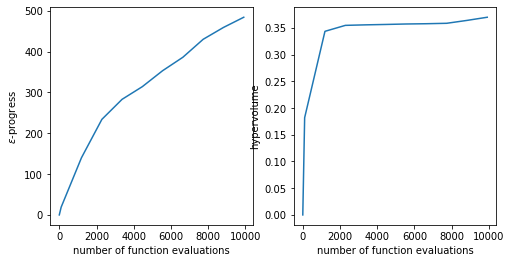

In [13]:
with MultiprocessingEvaluator(lake_model) as evaluator:
    results4, convergence4= evaluator.optimize(nfe=10000, 
                                               epsilons=[0.01, 0.01, 0.01, 0.01], 
                                               convergence=convergence_metrics)
    
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(8,4))
ax1.plot(convergence4.nfe, convergence4.epsilon_progress)
ax1.set_ylabel('$\epsilon$-progress')
ax2.plot(convergence4.nfe, convergence4.hypervolume)
ax2.set_ylabel('hypervolume')

ax1.set_xlabel('number of function evaluations')
ax2.set_xlabel('number of function evaluations')
plt.show()

**plot the tradeoffs you have found using a parallel axis plot**

We can visualize these tradeoffs on **parallel axis plots**. In these plots, each dimension is shown as a vertical axis. Each solution is represented by a line on this plot, which crosses the objective axes at the corresponsing value. You can use the [parcoords functionality](https://emaworkbench.readthedocs.io/en/latest/ema_documentation/analysis/parcoords.html) for this that comes with the ema_workbench. Ensure that the direction of desirability is the same for the four objectives.|



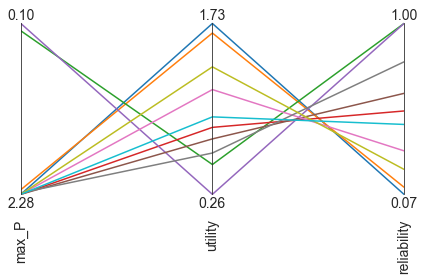

In [16]:
from ema_workbench.analysis import parcoords
outcomes1 = results1.loc[:, ['max_P', 'utility', 'reliability']]

limits = parcoords.get_limits(outcomes1)
axes = parcoords.ParallelAxes(limits)
axes.plot(outcomes1)

# we invert this axis so direction of desirability is the same 
axes.invert_axis('max_P') 
plt.show()

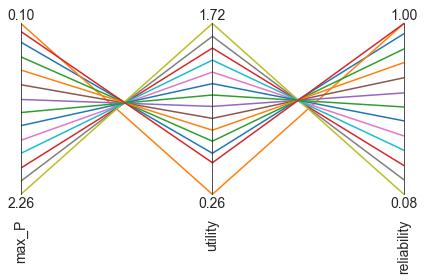

In [17]:
outcomes2 = results2.loc[:, ['max_P', 'utility', 'reliability']]

limits = parcoords.get_limits(outcomes2)
axes = parcoords.ParallelAxes(limits)
axes.plot(outcomes2)

# we invert this axis so direction of desirability is the same 
axes.invert_axis('max_P') 
plt.show()

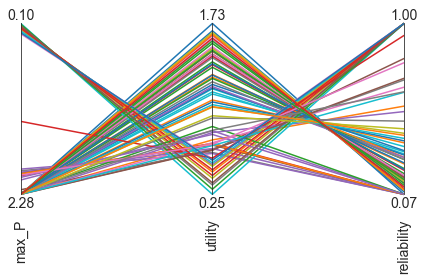

In [18]:
outcomes3 = results3.loc[:, ['max_P', 'utility', 'reliability']]

limits = parcoords.get_limits(outcomes3)
axes = parcoords.ParallelAxes(limits)
axes.plot(outcomes3)

# we invert this axis so direction of desirability is the same 
axes.invert_axis('max_P') 
plt.show()

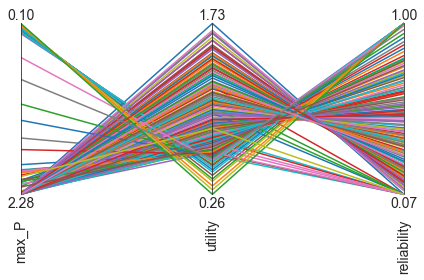

In [19]:
outcomes4 = results4.loc[:, ['max_P', 'utility', 'reliability']]

limits = parcoords.get_limits(outcomes4)
axes = parcoords.ParallelAxes(limits)
axes.plot(outcomes4)

# we invert this axis so direction of desirability is the same 
axes.invert_axis('max_P') 
plt.show()

**What does this plot tell us about the tradeoffs and conflicting objectives?**

In [ ]:
#utility conflicts with max_p and reliability

## Step 3: Re-evaluate candidate solutions under uncertainty

We now have a large number of candidate solutions (policies), we can re-evaluate them over the various deeply uncertain factors to assess their robustness against uncertainties.

For this robustness evaluation, we need to explore the scenarios for each solution. It means that, if we would like to run for instance 1000 scenarios for each solution, we might have to execute a very large number of runs.

Here, to simplify the case, let's suppose that decision makers have a hard constrain on *reliability*. No solution with less than 90% reliability is acceptable for them. Therefore, we can reduce the size of the solution set according to this constraint. 

**Apply this constraint of reliability on the results, and create a new dataframe named new_reults**


In [22]:
new_results = results4[results4['reliability']>0.9]


**From new_results, which is the reduced dataframe of candidate solutions, make a list of policies in a format that can be inputed to the *perform_experiments* function of the EMA workbench.**

*hint: you need to transform each policy to a dict, and then use this dict as input for the Policy class that comes with the workbench*

In [39]:
from ema_workbench import Policy
policiesdic = {}
for i in range(len(new_results)):
    policiesdic[i] = new_results[new_results.columns[0:5]].iloc[i].to_dict()
    


policies = [Policy('policy 1', **policiesdic[0]),
            Policy('policy 2', **policiesdic[1]),
            Policy('policy 3', **policiesdic[2]),
            Policy('policy 4', **policiesdic[3]),
            Policy('policy 5', **policiesdic[4]),
            Policy('policy 6', **policiesdic[5]),
            Policy('policy 7', **policiesdic[6]),
            Policy('policy 8', **policiesdic[7]),
            Policy('policy 9', **policiesdic[8]),
            Policy('policy 10', **policiesdic[9]),
            Policy('policy 11', **policiesdic[10]),
            Policy('policy 12', **policiesdic[11]),
            Policy('policy 13', **policiesdic[12]),
            Policy('policy 14', **policiesdic[13]),
            Policy('policy 15', **policiesdic[14]),
            Policy('policy 16', **policiesdic[15]),
            Policy('policy 17', **policiesdic[16]),
            Policy('policy 18', **policiesdic[17]),
            Policy('policy 19', **policiesdic[18])]

**Perform 1000 scenarios for each of the policy options. Depending on how many solutions are left after implementing the constraint, consider using multiprocessing or ipyparallel to speed up calculations.**

If you want to use ipyparallel, don't forget to start ipcluster.

In [40]:
with MultiprocessingEvaluator(lake_model) as evaluator:
    resultsRob = evaluator.perform_experiments(scenarios = 1000, policies= policies)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 19 policies * 1 model(s) = 19000 experiments
[MainProcess/INFO] 1900 cases completed
[MainProcess/INFO] 3800 cases completed
[MainProcess/INFO] 5700 cases completed
[MainProcess/INFO] 7600 cases completed
[MainProcess/INFO] 9500 cases completed
[MainProcess/INFO] 11400 cases completed
[MainProcess/INFO] 13300 cases completed
[MainProcess/INFO] 15200 cases completed
[MainProcess/INFO] 17100 cases completed
[MainProcess/INFO] 19000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


We can now evaluate the **robustness** of each of the policy options based on these scenario results. We can calculate the robustness of a policy option in terms of its performance on an outcome indicator across the 1000 scenarios. In other words, we can identify how robust a policy is in terms of each outcome indicator, and investigate the robustness tradeoffs.  

There are multiple metrics to quantify robustness. On of them is the *signal to noise ratio*, which is simply the mean of a dataset divided by its standard deviation. For instance, for an outcome indicator to be maximized, we prefer a high average value across the scenarios, and a low standard deviation, implying a narrow uncertaintiy range. Therefore, we want to maximize the signal-to-noise ratio. For an outcome indicator to be minimized, a lower mean and a lower standard deviation is preferred. Therefore the formulation is different.

**Write a function to calculate the signal-to-noise ratio for both kinds of outcome indicators. Calculate the signal-to-noise ratios for each outcome and each policy option. Plot the tradeoffs on a parallel axis plot. Which solutions look like a good compromise policy?**

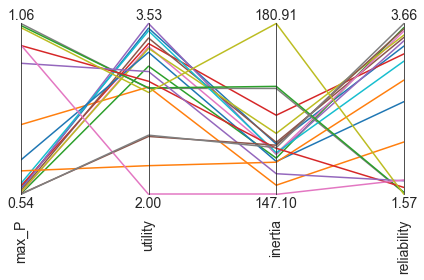

In [41]:
experimentsRob, outcomesRob = resultsRob
#we want to create a df

import pandas as pd

dfRatio = {}
for key in outcomesRob.keys():
    dfRatio[key] = []
    i = int(len(outcomesRob[key]) / 1000)
    for i in range(i):
        dfRatio[key].append(outcomesRob[key][i*1000:i*1000+1000].mean()/outcomesRob[key][i*1000:i*1000+1000].std())

signoice = pd.DataFrame.from_dict(dfRatio)

limits = parcoords.get_limits(signoice)
axes = parcoords.ParallelAxes(limits)
axes.plot(signoice)

Another robustness metric is **maximum regret**, calculated again for each policy and for each outcome indicator. *Regret* is defined for each policy under each scenario, as the difference between the performance of the policy in a specific scenario and the berformance of a no-regret (i.e. best possible result in that scenario) policy. The *maximum regret*  is then the maximum of such regret values across all scenarios. We of course favor policy options with low *maximum regret* values. 

**Write a function to calculate the maximum regret. Calculate the maximum regret values for each outcome and each policy option. Plot the tradeoffs on a parallel plot. Which solutions look like a good compromise policy?**

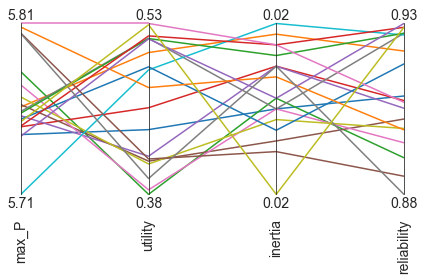

In [42]:
import pandas as pd

dfRatio = {}
for key in outcomesRob.keys():
    dfRatio[key] = []
    i = int(len(outcomesRob[key]) / 1000)
    for i in range(i):
        dfRatio[key].append(outcomesRob[key][i*1000:i*1000+1000].max()-outcomesRob[key][i*1000:i*1000+1000].min())

maxReg = pd.DataFrame.from_dict(dfRatio)

limits = parcoords.get_limits(maxReg)
axes = parcoords.ParallelAxes(limits)
axes.plot(maxReg)

We now have an understanding of which solutions have decent robustness using 2 different robustness metrics. A related but different question is to assess the uncertain conditions under which we get poor performance. For this, we can use scenario discovery. Since we want to identify the uncertainties only, we can remove the policy column from the experiments DataFrame. 

**Perform Scenario Discovery, focussed on understanding the conditions under which utility is lower than 0.75**

In [43]:
from ema_workbench.analysis import prim

#the variables
x = experimentsRob.drop(['c1', 'c2', 'r1', 'r2', 'w1', 'policy'], axis=1)

#creates a true false array, with the outcomes of interests
y = outcomesRob['utility'] < 0.75

#what does the treshold do?
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 19000 points remaining, containing 18999 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.95, coverage: 0.9500500026317175, density: 1.0 restricted_dimensions: 1


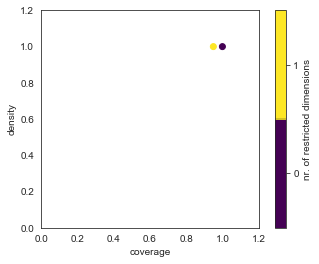

In [44]:
box1.show_tradeoff()
plt.show()

coverage    0.95005
density           1
id                1
mass           0.95
mean              1
res_dim           1
Name: 1, dtype: object

          box 1                                       
            min       max                    qp values
delta  0.930635  0.956311  [-1.0, 0.38673135470140996]



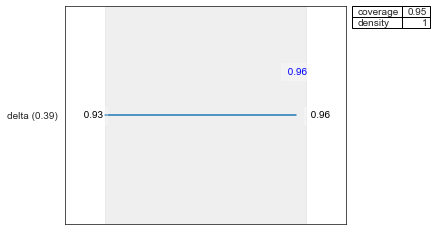

In [47]:
#starts at 0
# which one do you want, maximise nr of restricted dimensions or coverage, if density stays the same

box1.inspect(1)
box1.inspect(1, style='graph')
plt.show()
